# EDA project for King Country House Sales

## Readmap
1) Look into the data
- 1.1) Load data and inspect the table
- 1.2) Histplot of the numerical data
- 1.3) Heatmap
- 1.4) Best Correlations
- 1.5) Pairplot (monster overview)

2) Questions
- 2.1) Is condition or grade better to estimate the price?
- 2.2) What is the best time to buy or sell a house?
- 2.3) Is a House with a waterfront more expensive than others?
- 2.4) Does the house size effect the price?
- 2.5) Do the neighbours effect the house price?

3) Linear Regression
- 3.1) Linear Regression with one variabel
- 3.2) Multiple Linear Regression

4) Summary

5) Outlook

## 1.1) Load data and inspect the table

see the column names

In [1]:
!cat kc_house_prices/column_names.md

# Column Names and descriptions for King County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  # of bedrooms
* **bathroomsNumber** - # of bathrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbor

Those are a lot of columns lets look closer!

Import Libarys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

load the data

In [3]:
data = pd.read_csv('kc_house_prices/King_County_House_prices_dataset.csv') 
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
print('--info()--')
print('--------')
print(data.info())

print('\n--------')    
print('--describe--')
print('--------')
print(data.describe())

--info()--
--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null 

In [5]:

data['datetime'] = pd.to_datetime(data.date)
data.drop(['date'],inplace=True, axis=1)
data['sqft_basement_num'] = pd.to_numeric(data[data['sqft_basement']!='?'].sqft_basement)

data_num = data.select_dtypes(include = ['float64', 'int64'])

Note:
- create a new column called datetime: is the data column converted in data type
- create a new column called sqft_basement_num with the numerical data of sqft_basement

In this section the data is ploted to gain a quick overview

## 1.2) Histplot of the numerical data

<Figure size 432x288 with 0 Axes>

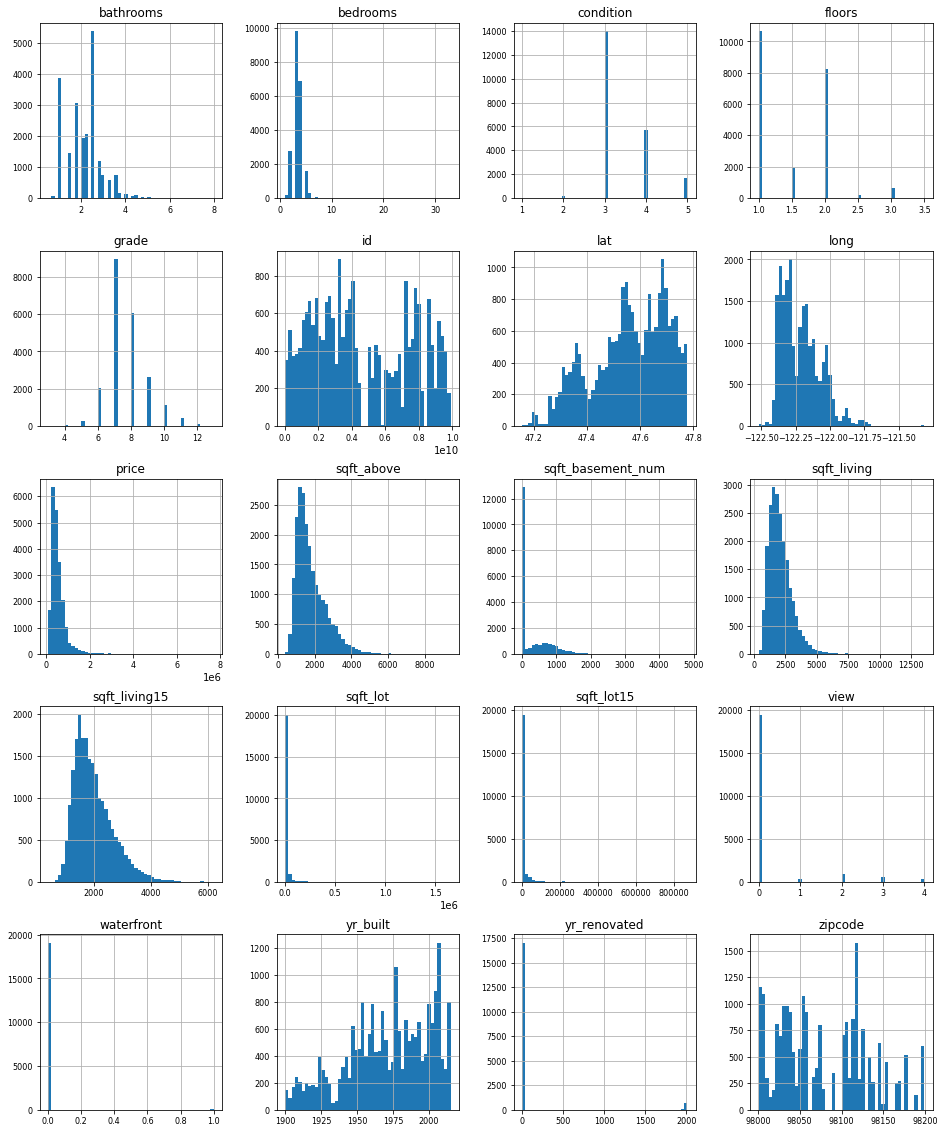

In [6]:
plt.figure()
data_num.hist(figsize=(16,20),bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

Note:
good overview about the spreading of the numerical data
It could be a good idea to make the data ... categorical
For building a linear model outliners have to take into acount

## 1.2) Heatmap

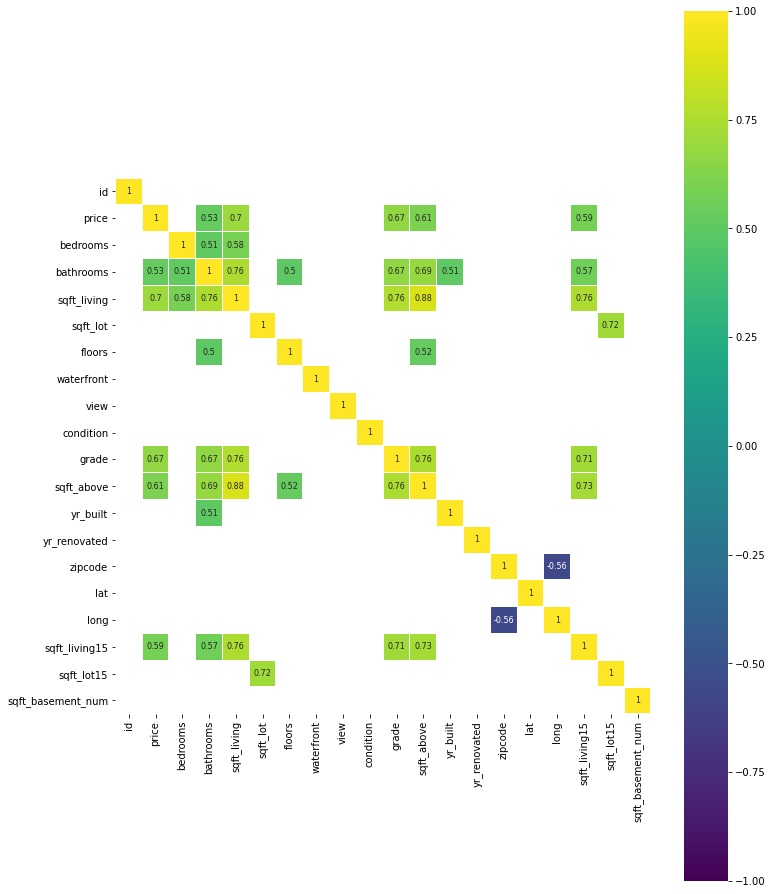

In [7]:
corr = data_num.corr()
plt.figure(figsize=(12,16))
sns.heatmap(corr[(corr>=0.5) | (corr <=-0.4)], 
           cmap = 'viridis', vmax=1.0, vmin=-1.0, linewidths = 0.1,
           annot=True, annot_kws={"size":8},square=True)

Note:
- Correlation:
   - price      with sqft_living15, sqft_above, grade, sqft_living, bathrooms
   - grade      with price, bathrooms, sqft_living, yr_built, grade
   - sqft_above with price, bathrooms, floors, grade
   - bedrooms   with sqft_living, bathrooms
    
- No Correlation:
   - yr_renovated, maybe because it is better to assume that this is a categorical variable
   - bedrooms not with the price

## 1.3) Best Correlations
show the best correlations 

6 correlated with price
price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
Name: price, dtype: float64


<Figure size 1296x864 with 0 Axes>

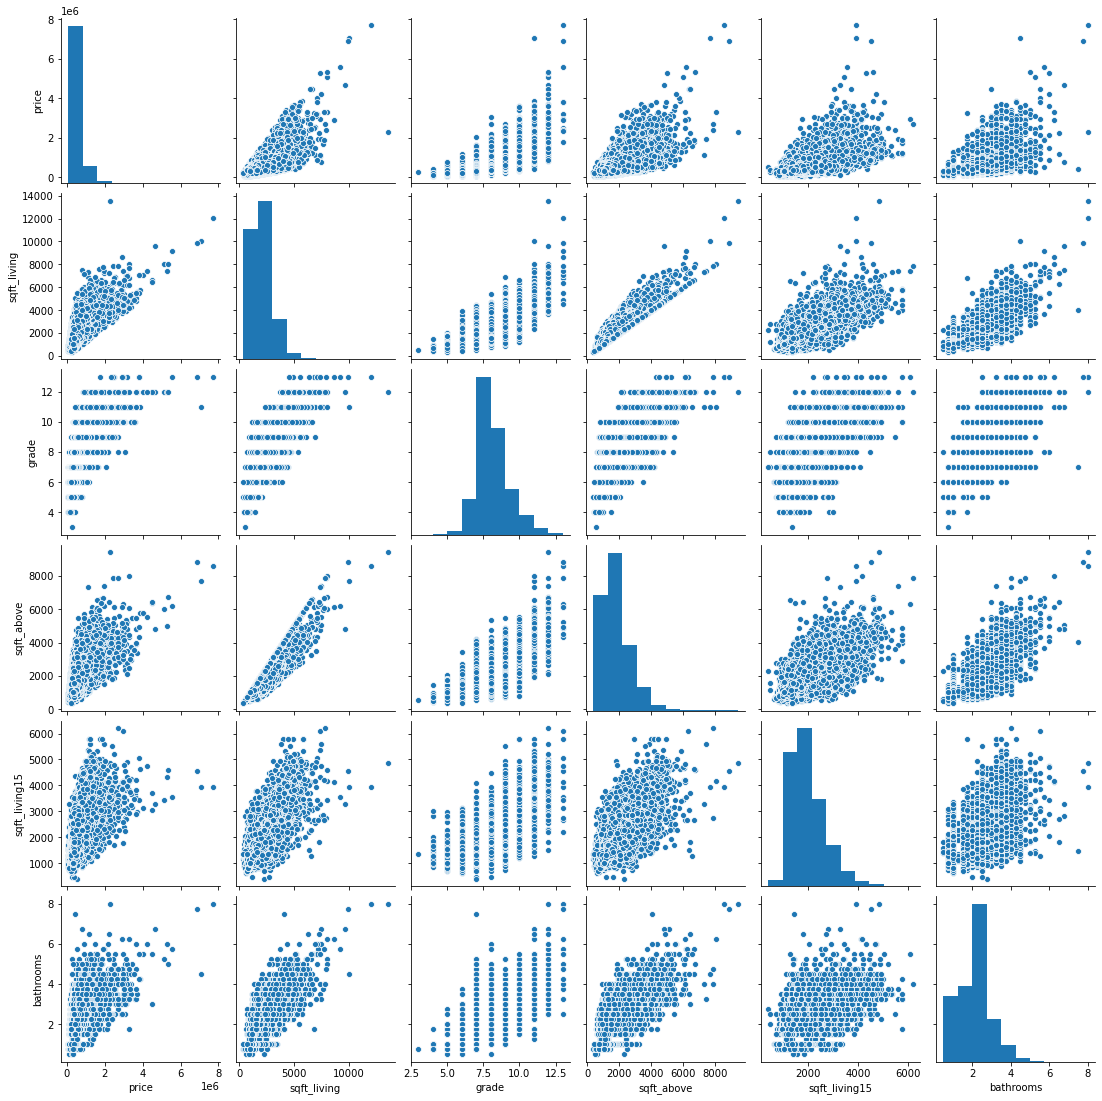

In [8]:
df_corr = data_num.corr()['price'][:-1]
best_features_ls = df_corr[abs(df_corr)>0.5].sort_values(ascending=False)
print("{} correlated with price\n{}".format(len(best_features_ls),best_features_ls))
best_features_name = [i for i in best_features_ls.index] 
plt.figure(figsize=(18,12))
plot = sns.pairplot(data[best_features_name])
plt.show()

Note:
- grade is category
- string linearity sqft_above with sqft_living
- Price strongly correlats with

``
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906``

## 1.4) pairplot (monster overview)

<Figure size 432x288 with 0 Axes>

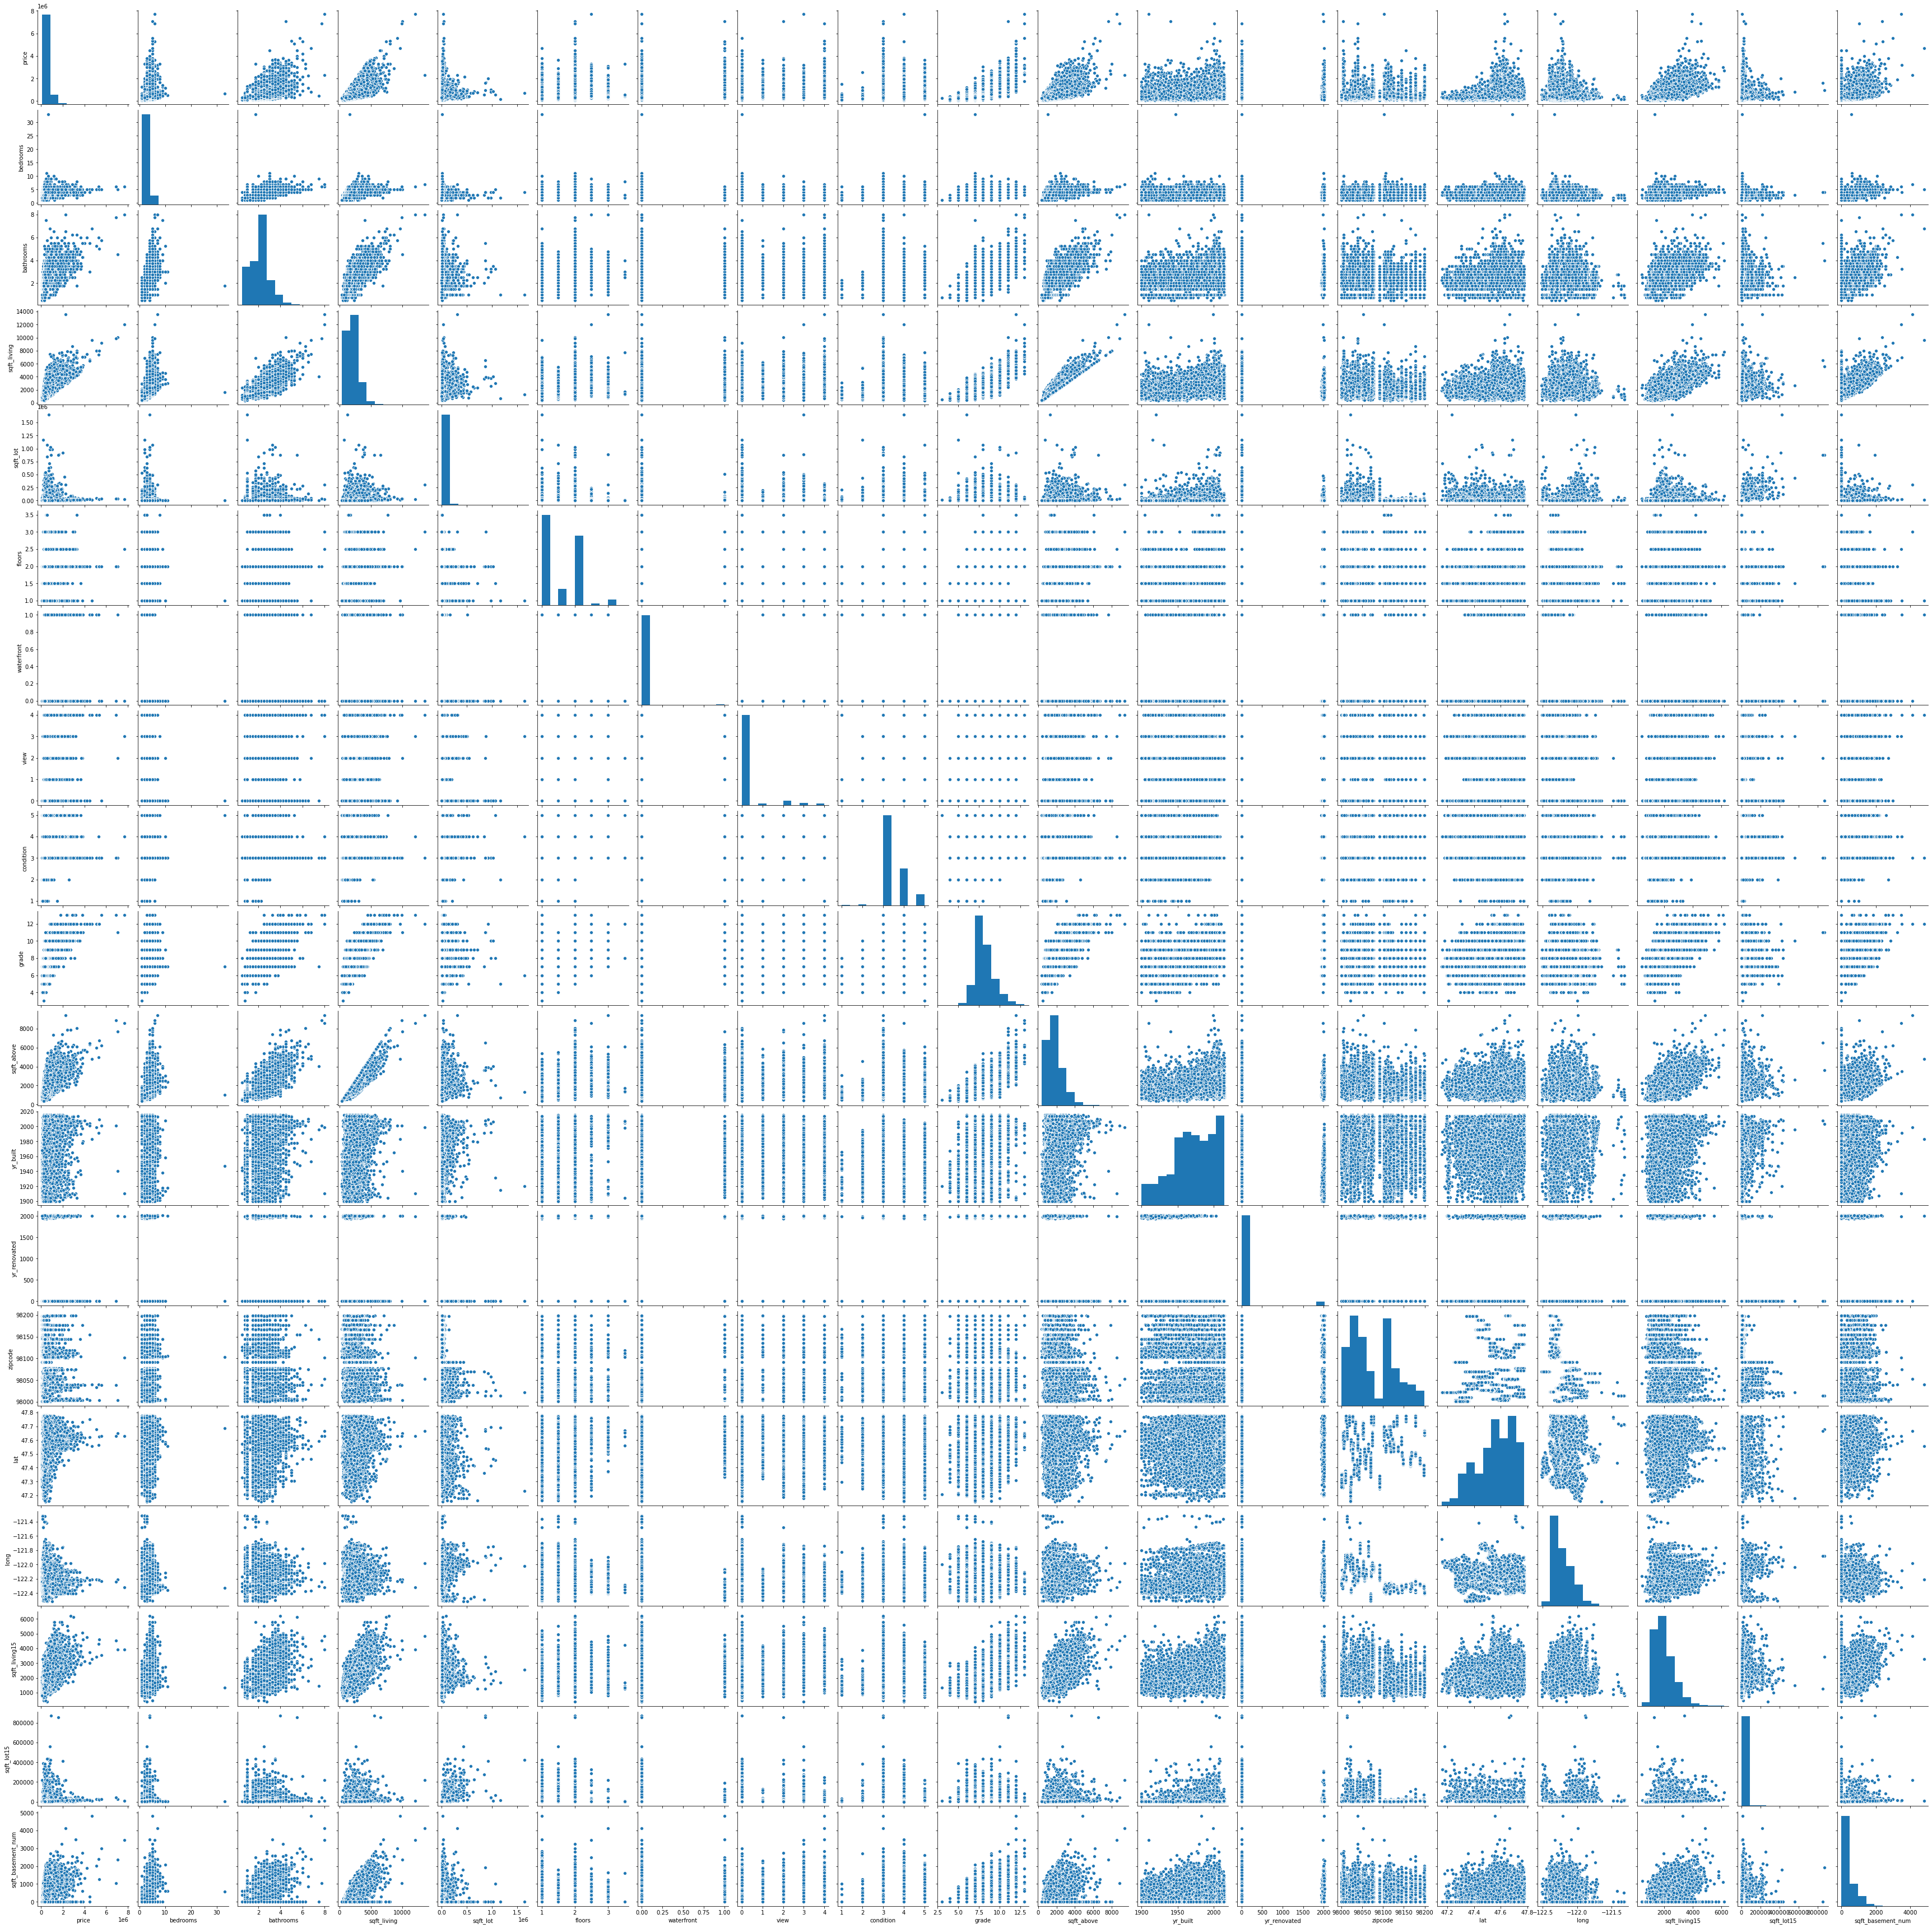

In [9]:
plt.figure()
sns.pairplot(data_num.iloc[:,1:])
plt.show()

note:
    - to have a quick overview between the relationship between the columns

# 2) Questions
- 2.1) Is condition or grade better to estimate the price?
- 2.2) What is the best time to buy or sell a house?
- 2.3) Does a House with a water front more expensive than others?
- 2.4) Is the house size effect the price?
- 2.5) Does the neighbours effect the house price?

## 2.1) Is condition or grade better to estimate the price?
- columns:
    * **condition** - How good the condition is ( Overall )
    * **grade** - overall grade given to the housing unit, based on King County grading system

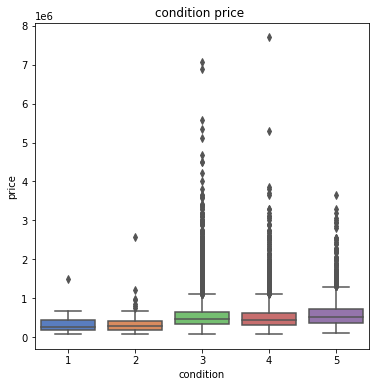

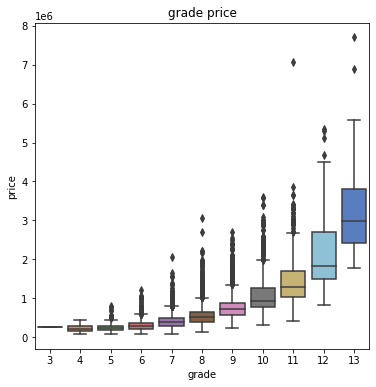

In [10]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="condition", y="price",
                            data=data, palette="muted")
plt.title('condition price ')
plt.show()


plt.figure(figsize=(6,6))
ax = sns.boxplot(x="grade", y="price",
                            data=data, palette="muted")
plt.title('grade price')
plt.show()


Note 
- if the condition has a high number the pice is in average higher
- if the condition is bigger than 3 there more outliner
- the highist price has conditon 4
- bigger gap betwenn the 
- greade is better than condition to estimate the price

## 2.2) What is the best time to buy or sell a house?
- column:
    * **pricePrice** -  is prediction target
    * **dateDate** - house was sold

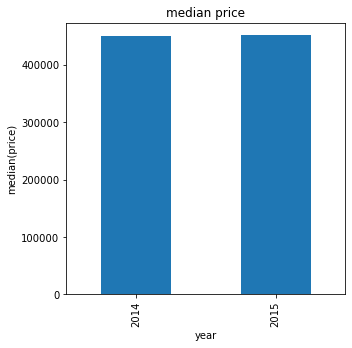

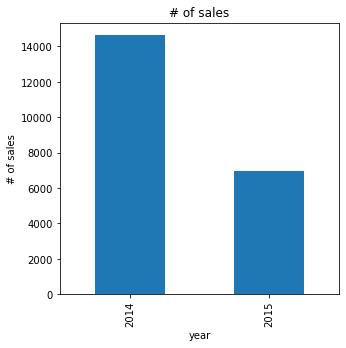

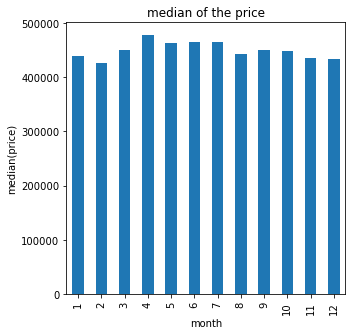

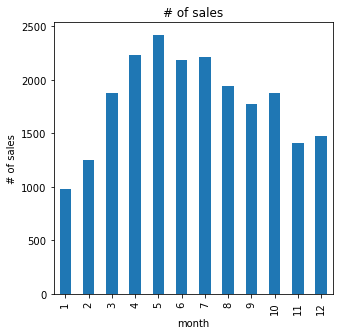

In [11]:
plt.figure(figsize=(5,5))
data.groupby(data["datetime"].dt.year)['price'].median().plot(kind="bar")
plt.ylabel('median(price)')
plt.title('median price')
plt.xlabel('year')
plt.show()

plt.figure(figsize=(5,5))
data.groupby(data["datetime"].dt.year)['price'].count().plot(kind="bar")
plt.ylabel('# of sales')
plt.xlabel('year')
plt.title('# of sales')
plt.show()

plt.figure(figsize=(5,5))
data.groupby(data["datetime"].dt.month)['price'].median().plot(kind="bar")
plt.title('median of the price')
plt.xlabel('month')
plt.ylabel('median(price)')
plt.show()

#plt.figure(figsize=(14,5))
plt.figure(figsize=(5,5))
data.groupby(data["datetime"].dt.month)['price'].count().plot(kind="bar")
plt.title('# of sales')
plt.ylabel('# of sales')
plt.xlabel('month')
plt.show()

Note:    
- more house where sold in 2014

- no month depends or year depends regrading the mean

## 2.3) Does a House with a water front more expensive than others?
column: * **waterfront** - House which has a view to a waterfront


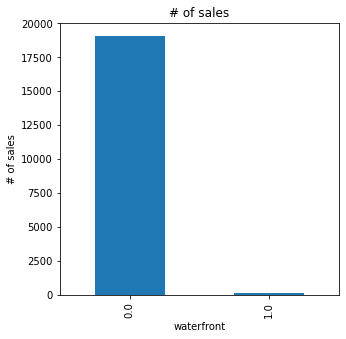

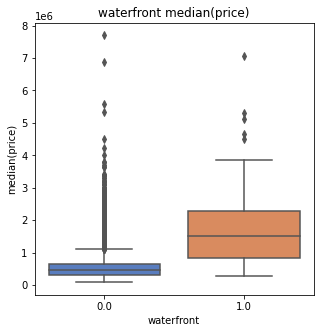

In [12]:
plt.figure(figsize=(5,5))
data.groupby(data["waterfront"])['price'].count().plot(kind="bar")
plt.title('# of sales')
plt.ylabel('# of sales')
plt.show()

plt.figure(figsize=(5,5))
ax = sns.boxplot(x="waterfront", y="price",
                           data=data, palette="muted")
plt.title('waterfront median(price)')
plt.ylabel('median(price)')
plt.show()

- houses with a waterfront are rarely sells
- houses with a waterfront are more pricier regrading the median
- houses with a waterfront are more likly in a better condition

## 2.4) Is the house size effect the price?
done
- columns: 
    * **sqft_above** - square footage of house apart from basement
    * **sqft_basement** - square footage of the basement

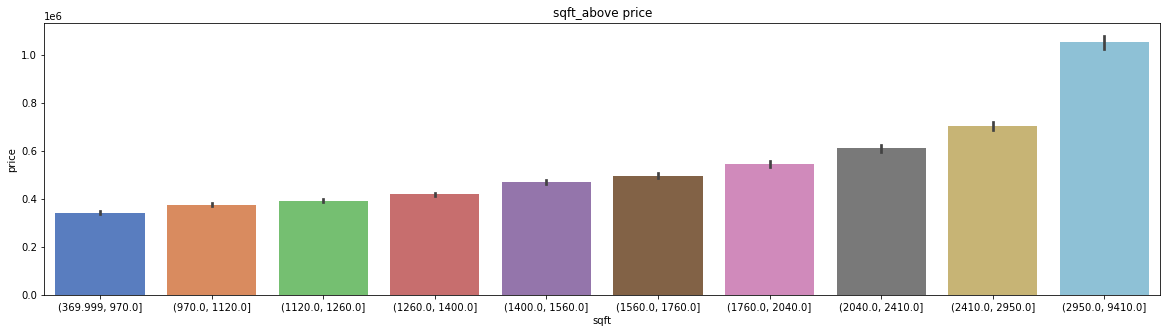

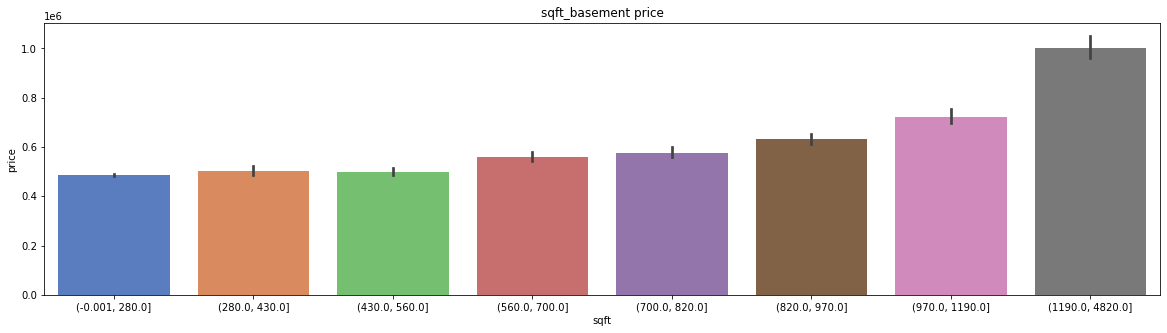

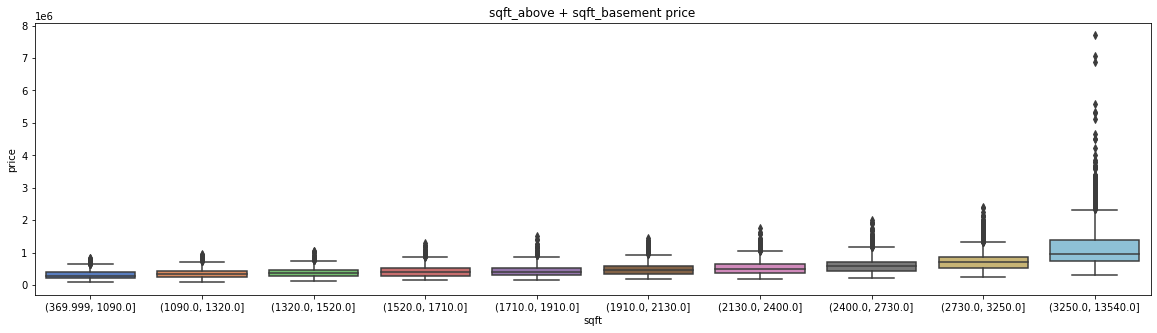

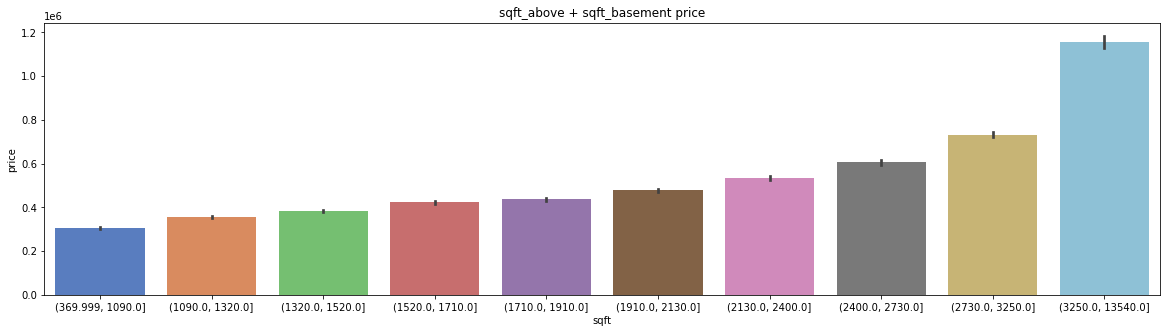

In [13]:
data['sqft_above_quartiles'] = pd.qcut(data['sqft_above'], 10)
data['sqft_basement_num_quartiles'] = pd.qcut(data['sqft_basement_num'], 20, duplicates='drop')
data['sqft_basement_above_qu'] = data['sqft_basement_num'] + data['sqft_above']
data['sqft_basement_above_qu_quartiles'] = pd.qcut(data['sqft_basement_above_qu'] , 10, duplicates='drop')


plt.figure(figsize=(20,5))
ax = sns.barplot(x="sqft_above_quartiles", y="price",
                            data=data, palette="muted")
plt.title('sqft_above price')
plt.xlabel('sqft')
plt.show()


plt.figure(figsize=(20,5))
ax = sns.barplot(x="sqft_basement_num_quartiles", y="price",
                            data=data, palette="muted")
plt.title('sqft_basement price')
plt.xlabel('sqft')
plt.show()


plt.figure(figsize=(20,5))
ax = sns.boxplot(x="sqft_basement_above_qu_quartiles", y="price",
                            data=data, palette="muted")
plt.title('sqft_above + sqft_basement price')
plt.xlabel('sqft')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.barplot(x="sqft_basement_above_qu_quartiles", y="price",
                            data=data, palette="muted")
plt.title('sqft_above + sqft_basement price')
plt.xlabel('sqft')
plt.show()

Note:
- bigger more cost

## 2.1) Do the neighbours effect the house price?
- columns
    * **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
    * **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

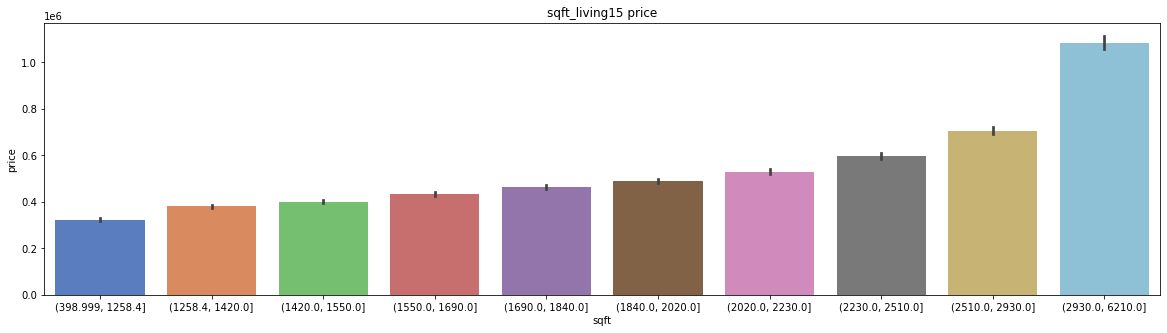

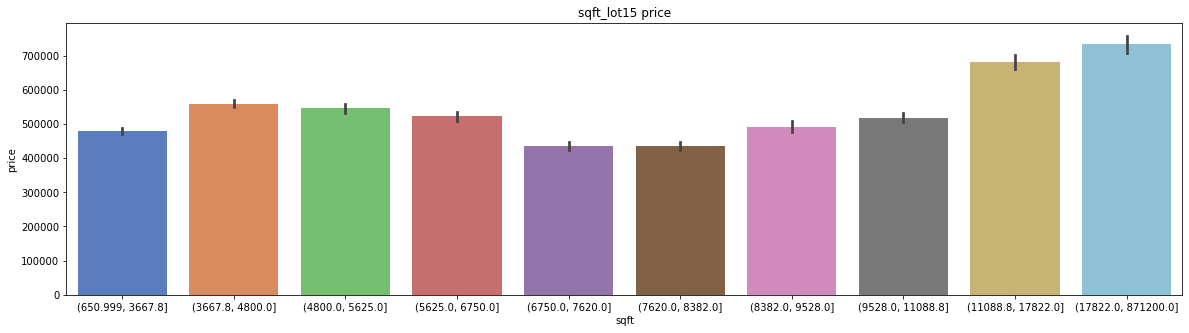

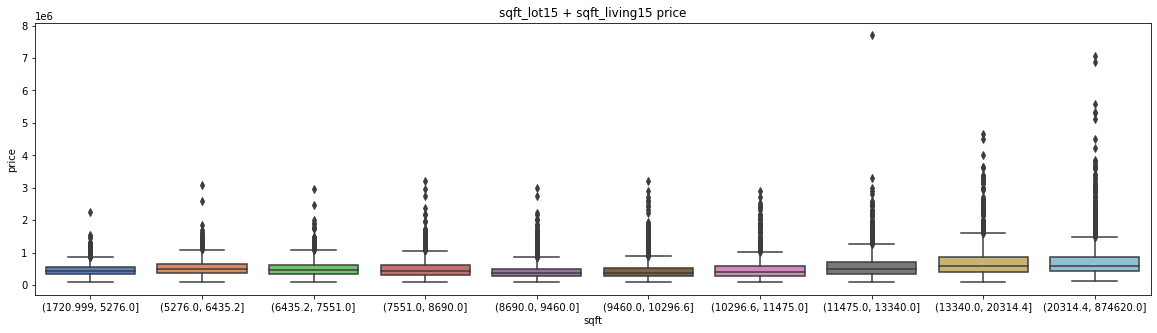

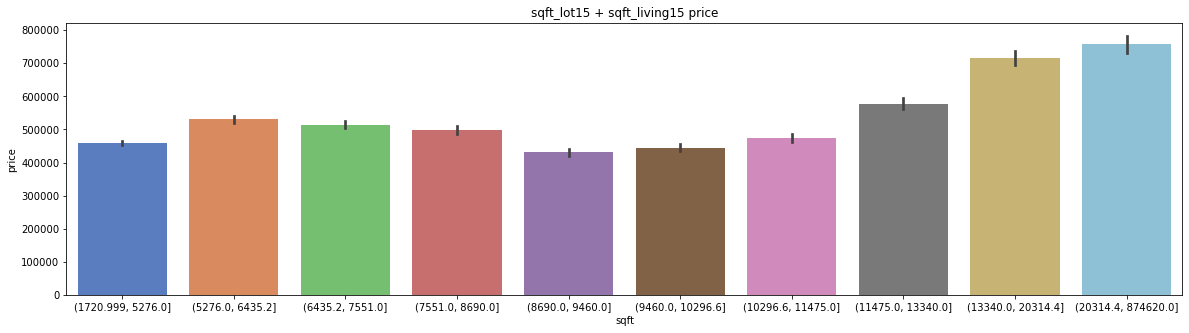

In [14]:
data['sqft_nei'] = data['sqft_living15'] + data['sqft_lot15']
data['sqft_nei_quartiles'] = pd.qcut(data['sqft_nei'] , 10, duplicates='drop')

data['sqft_li15_quartiles'] = pd.qcut(data['sqft_living15'] , 10, duplicates='drop')
data['sqft_lo15_quartiles'] = pd.qcut(data['sqft_lot15'] , 10, duplicates='drop')

plt.figure(figsize=(20,5))
ax = sns.barplot(x="sqft_li15_quartiles", y="price",
                            data=data, palette="muted")
plt.title('sqft_living15 price')
plt.xlabel('sqft')
plt.show()


plt.figure(figsize=(20,5))
ax = sns.barplot(x="sqft_lo15_quartiles", y="price",
                            data=data, palette="muted")
plt.title('sqft_lot15 price')
plt.xlabel('sqft')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.boxplot(x="sqft_nei_quartiles", y="price",
                            data=data, palette="muted")
plt.title('sqft_lot15 + sqft_living15 price')
plt.xlabel('sqft')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.barplot(x="sqft_nei_quartiles", y="price",
                            data=data, palette="muted")
plt.title('sqft_lot15 + sqft_living15 price')
plt.xlabel('sqft')
plt.show()

Note:
- sqft_living15 depends to prize regrading the mean value of price
- sqft_lot15 depends to not price regrading the mean value of price
- sum of sqft_lot15 and sqft_living15 does not depends linearly on the mean price


# 3) Linear Regression
In this section a Linear Regression is achived for the price variable.

- 3.1) Linear Regression with one variabel
- 3.2) Multiple Linear Regression

## 3.1) Linear Regression with one variabel

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:21:52   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      

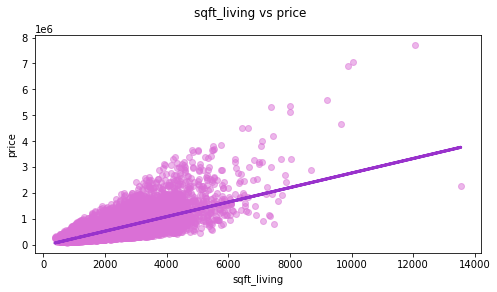

In [15]:
model = smf.ols(formula='price ~ sqft_living', data=data).fit()
print(model.summary())

fig, ax = plt.subplots(figsize=(8, 4))
x = data.sqft_living
y = data.price
intercept, slope = model.params
# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('sqft_living vs price')
# plotting regression line
ax.plot(x, x*slope +intercept, '-', color='darkorchid', linewidth=3);
ax.set_ylabel("price");
ax.set_xlabel("sqft_living");
plt.show()

Note:
- for one Variabel is a rough estimation
- the trend is picked 
- R-squared is 0.47

## 3.2) Multiple Linear Regression

Mean squared error: 0.00
Coefficient of determination: 1.00
1.0


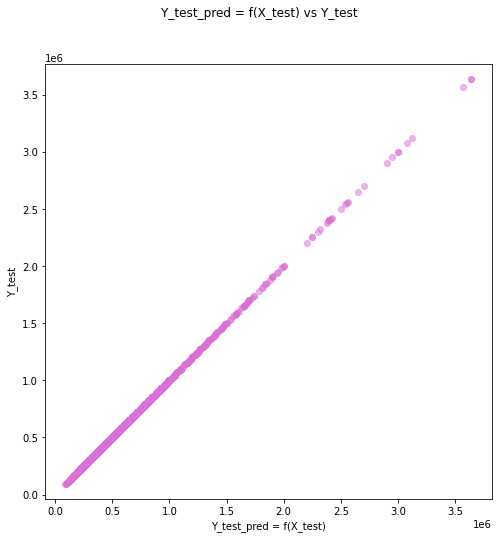

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# === load data ===
data = pd.read_csv('kc_house_prices/King_County_House_prices_dataset.csv') 
data['sqft_basement_num'] = pd.to_numeric(data[data['sqft_basement']!='?'].sqft_basement)
data.head()

data = data.replace([np.inf, -np.inf], np.nan)
data.dropna(inplace=True)

# === built training data ===
Y = data['price']
X = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_basement_num']]

X = pd.get_dummies(data=X, drop_first=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

# === built model ===
my_model = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
my_model.fit(X_train, Y_train)
Y_test_pred = my_model.predict(X_test)

# === evaluate model ===
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_test_pred))

result = my_model.score(X_test, Y_test_pred)
print(result)

# === plot data ===
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(Y_test_pred, Y_test, alpha=0.5, color='orchid')
fig.suptitle('Y_test_pred = f(X_test) vs Y_test ')
ax.axis('equal')
ax.set_ylabel("Y_test");
ax.set_xlabel("Y_test_pred = f(X_test)");
plt.show()

Note:
- the model has a good fit

# 4) Summary
- There is a strong correlation between the size of a house and the price
- In the data are a lot of Outliner 
- More features help to implove the linear regression predition model

# 5) Outlook

- Renovation via price 
- Model
    - Refine the linear model
    - Cut outliners
    - Normalize the data set
    - Compare linear model to other models
- Map Gps points
- Convert to „normale“ units Sqrf to sqrm :)
- Create use case for customers
    - I like to have/sell that house with these properties and I want to have ...


in section:
2.4) Does the house size effect the price?
can be done?

    columns:
        bedroomsNumber - # of bedrooms
        bathroomsNumber - # of bathrooms
        sqft_livingsquare - footage of the home
            sqft_lotsquare - footage of the lot
            floorsTotal - floors (levels) in hous